Podklady pro články Anety Martínkové na iROZHLAS.cz v prosinci 2023.

In [1]:
import os
import pandas as pd

In [2]:
from src.tabulka import tabulka
from src.graf import graf

In [3]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))

In [4]:
df = df.sort_values(by = ['rok','tyden','pozice'], ascending=True)

In [5]:
df['wk'] = df['week'].rank(method='dense').astype(int)

In [6]:
premiery_pisni = pd.DataFrame(df.groupby(['interpret_hlavni','track'])['wk'].min()).reset_index().rename(columns={'wk': 'wk_poprve'})

In [7]:
df = df.merge(premiery_pisni, on=['interpret_hlavni','track'], how='outer')

In [8]:
df['tyden_pisne'] = df['wk'] - df['wk_poprve'] + 1

In [9]:
df['tyden_pisne_bez_pauz'] = df.groupby(['interpret_hlavni', 'track']).cumcount() + 1

## Kontrola

<Axes: xlabel='week'>

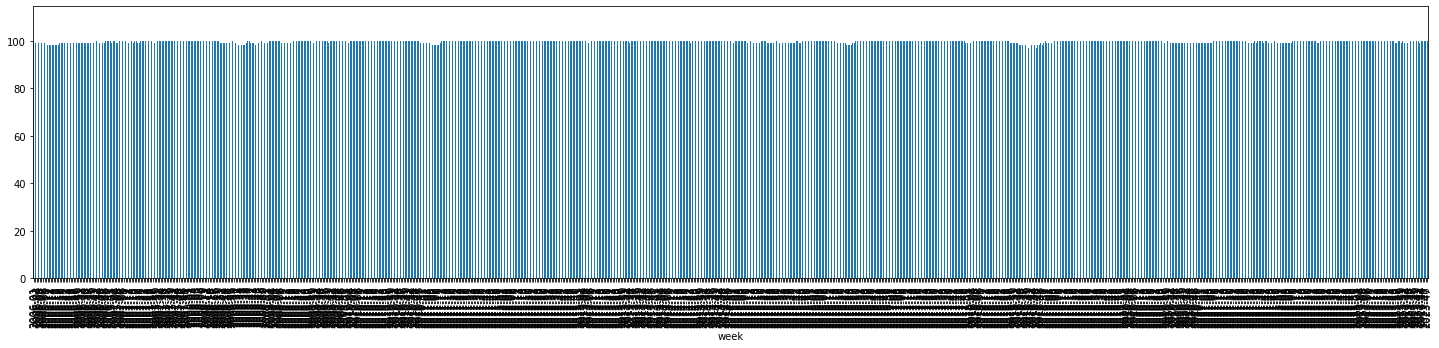

In [10]:
df.groupby('week')['track'].nunique().plot.bar(figsize=(25,5))

## Pozoruhodné tracky

### Ve kterém týdnu (ne od začátku vysílání, ale od prvního průniku do top 100!) se píseň stala #1

In [11]:
nepocitat = df[df['week'] == '2006-01']['track'].to_list()

In [12]:
df[(~df['track'].isin(nepocitat)) & (df['pozice'] == 1)].groupby(['interpret_hlavni','track'])['tyden_pisne'].min().nsmallest(20)

interpret_hlavni    track                
Chinaski            Láska a data             3
Miley Cyrus         Flowers                  3
Adele               Hello                    4
Chinaski            Měl bych si boty zout    4
Support Lesbiens    English Stereo           4
George Ezra         Shotgun                  5
Mirai               I přes to všechno        5
Adele               Skyfall                  6
Don Omar            Danza Kuduro             6
Ed Sheeran          Bad Habits               6
                    Shape of You             6
Gabry Ponte, Lum!X  Thunder                  6
Lewis Capaldi       Before You Go            6
Psy                 Gangnam Style            6
Václav Neckář       Půlnoční                 6
Adele               Easy On Me               7
Alec Benjamin       Let Me Down SLowly       7
Avicii              Wake Me Up               7
Carly Rae Jepsen    Call Me Maybe            7
Coldplay            Higher Power             7
Name: tyden_pisne,

### Těmto to naopak trvalo:

In [13]:
df[df['pozice'] == 1].groupby(['interpret_hlavni','track'])['tyden_pisne'].min().nlargest(20)

interpret_hlavni  track                
Ewa Farna         Vánoce na míru           256
Chinaski          Slovenský klín            36
Avicii            Without You               24
Morandi           Save Me                   24
September         Cry For You               23
Chinaski          Hlavolam                  22
Lenny Kravitz     I´ll Be Waiting           22
Coldplay          Paradise                  21
Klingande         Jubel                     21
Pussycat Dolls    Hush Hush                 21
Shaun Baker       Hey Hi Hello              21
Divokej Bill      Čmelák                    20
Flipsyde          Happy Birthday            20
Adele             Set Fire To The Rain      19
Alan Walker       Alone                     19
B.O.B.            Airplanes                 19
Black Eyed Peas   Just Can´t Get Enough     19
Charli Xcx        Boom Clap                 19
Enrique Iglesias  Do You Know               19
Milky Chance      Stolen Dance              19
Name: tyden_pisne, d

### Nejpozdější top 1 (tentokrát i ty co byly top 1 dříve)

In [14]:
df[df['pozice'] == 1].groupby(['interpret_hlavni','track'])['tyden_pisne'].max().nlargest(20)

interpret_hlavni   track                     
Ewa Farna          Vánoce na míru                257
Chinaski           Slovenský klín                 43
Mirai              Když nemůžeš, tak přidej       41
Ed Sheeran         Bad Habits                     33
Mirai              Vedle tebe usínám              31
Kryštof            Zůstaň tu se mnou (Za sny)     29
Alesha Dixon       Boy Does Nothing               27
Coldplay           Viva La Vida                   27
Miley Cyrus        Flowers                        27
Nelly Furtado      Say It Right                   26
Edward Maya        Stereo Love                    25
Katy Perry         Hot ´N´ Cold                   25
Michael Schulte    Waterfall                      25
The Weeknd         Blinding Lights                25
Avicii             Without You                    24
Kryštof            Cesta                          24
Morandi            Save Me                        24
Peter Bič Project  Hey Now                        24


### Držáci top 10

#### Nejdéle od prvního výskytu v žebříčku (vč. pauz, kdy vypadly z top 100!):

In [15]:
df[df['pozice'] <= 10].groupby(['interpret_hlavni','track'])['tyden_pisne'].max().nlargest(20)

interpret_hlavni  track                   
Ewa Farna         Vánoce na míru              258
Václav Neckář     Půlnoční                    111
Kryštof           Vánoční                     109
Mirai             OTCHI                        88
Michal Hrůza      Pro Emu                      82
Jelen             Ještě jednu noc              76
Slza              Bouře                        68
O5                BRA3                         65
Mirai             Když nemůžeš, tak přidej     64
Kryštof           Co bude pak                  63
Mirai             I přes to všechno            62
Miley Cyrus       Angels Like You              60
Marek Ztracený    Naše cesty                   57
Mirai             Vedle tebe usínám            56
Lucie Bílá        Dobrý kafe                   54
Sunrise Avenue    Hollywood Hills              53
Alvaro Soler      Sofia                        52
Chinaski          Každý ráno                   52
                  Slovenský klín               52
Harry S

#### Nejvíce jednotlivých týdnů:

In [16]:
df[df['pozice'] <= 10].groupby(['interpret_hlavni','track'])['tyden_pisne'].nunique().nlargest(20)

interpret_hlavni  track                   
Mirai             Vedle tebe usínám           46
Jelen             Ještě jednu noc             44
Miley Cyrus       Flowers                     41
Ed Sheeran        Bad Habits                  40
Xindl X           V blbým věku                40
Chinaski          Měl bych si boty zout       39
Mirai             Když nemůžeš, tak přidej    39
                  I přes to všechno           37
Xindl X           Cudzinka v tvojej zemi      37
Kryštof           Co bude pak                 36
Chinaski          Slovenský klín              33
Shawn Mendes      Senorita                    33
Ava Max           Kings & Queens              32
O5                BRA3                        32
Ava Max           Sweet but Psycho            31
Chinaski          Potkal jsem tě po letech    31
Kryštof           Ty a já                     31
Alesha Dixon      Boy Does Nothing            30
Lewis Capaldi     Before You Go               30
Harry Styles      As it Wa

### Držáci kdekoliv

#### Nejdéle od prvního výskytu v žebříčku (vč. pauz, kdy vypadly úplně):

In [17]:
df.groupby(['interpret_hlavni','track'])['tyden_pisne'].max().nlargest(20)

interpret_hlavni  track                          
Wham!             Last Christmas                     764
Chinaski          Hvězdy nad hlavou                  718
Divokej Bill      Pocit                              685
Dan Bárta         On My Head                         618
Maroon 5          This Love                          581
Václav Neckář     Půlnoční                           569
Linkin Park       Breaking The Habit                 567
Billy Mack        Christmas Is All Around            564
Daniel Landa      Touha                              564
Lucie             Medvídek                           563
Janek Ledecký     Sliby se maj plnit o Vánocích      562
Mariah Carey      All I Want For Christmas Is You    562
David Guetta      Love Is Gone                       531
John Lennon       Happy Xmas (War Is Over)           511
Queen             Thank God It´s Christmas           511
Mandrage          Hledá se žena                      507
Coldplay          Viva La Vida        

#### Nejvíce jednotlivých týdnů:

In [18]:
df[df['pozice'] <= 100].groupby(['interpret_hlavni','track'])['tyden_pisne'].nunique().nlargest(20)

interpret_hlavni  track                              
Karel Gott        Srdce nehasnou                         180
Mirai             Když nemůžeš, tak přidej               176
Mandrage          Motýli                                 169
Michal Hrůza      Pro Emu                                165
Marek Ztracený    Naše cesty                             150
Mirai             Chci tančit                            150
                  OTCHI                                  140
Slza              Na srdci (feat. Celeste Buckingham)    139
Chinaski          Láska a data                           138
Marek Ztracený    Tak se nezlob (Podpantoflák)           134
O5                BRA3                                   134
Kelly Clarkson    Stronger (What Doesn´t Kill You)       129
The Weeknd        Blinding Lights                        128
Kryštof           Hned teď (pojď být světlometem)        125
Shawn Mendes      Senorita                               122
Jelen             Ještě jednu n

In [19]:
top10 = pd.DataFrame(df[df['pozice'] <= 100].groupby(['interpret_hlavni','track'])['tyden_pisne'].nunique().nlargest(10)).reset_index()

In [20]:
top10

,interpret_hlavni,track,tyden_pisne
0,Karel Gott,Srdce nehasnou,180
1,Mirai,"Když nemůžeš, tak přidej",176
2,Mandrage,Motýli,169
3,Michal Hrůza,Pro Emu,165
4,Marek Ztracený,Naše cesty,150
5,Mirai,Chci tančit,150
6,Mirai,OTCHI,140
7,Slza,Na srdci (feat. Celeste Buckingham),139
8,Chinaski,Láska a data,138
9,Marek Ztracený,Tak se nezlob (Podpantoflák),134


In [21]:
top10['Track'] = top10.apply(lambda x: f"""{x['interpret_hlavni']}: {x['track'].split("(")[0]}""", axis=1)
top10['Týdnů v top 100'] = top10['tyden_pisne']

In [22]:
tabulka(top10[['Track','Týdnů v top 100']], titulek="Držáci hitparády", podtitulek="Písně, které se od roku 2006 držely nejvíce týdnů v top 100 českého rádiového žebříčku.", poradi=True)

'<table class="dataframe table table--responsive table--w100p table--striped-red table--plain"><caption>Držáci hitparády</caption><thead><tr style="text-align: right;"><th class="text-nowrap"></th><th class="text-nowrap">Track</th><th class="text-nowrap">Týdnů v top 100</th></tr></thead><tbody class="text-sm"><tr><td>1.</td><td>Karel Gott: Srdce nehasnou</td><td>180</td></tr><tr><td>2.</td><td>Mirai: Když nemůžeš, tak přidej</td><td>176</td></tr><tr><td>3.</td><td>Mandrage: Motýli</td><td>169</td></tr><tr><td>4.</td><td>Michal Hrůza: Pro Emu</td><td>165</td></tr><tr><td>5.</td><td>Marek Ztracený: Naše cesty</td><td>150</td></tr><tr><td>6.</td><td>Mirai: Chci tančit</td><td>150</td></tr><tr><td>7.</td><td>Mirai: OTCHI</td><td>140</td></tr><tr><td>8.</td><td>Slza: Na srdci</td><td>139</td></tr><tr><td>9.</td><td>Chinaski: Láska a data</td><td>138</td></tr><tr><td>10.</td><td>Marek Ztracený: Tak se nezlob</td><td>134</td></tr></tbody><tfoot><tr style="text-align: center;"><td colspan=3>Pí

## Graf pozoruhodných písní

In [23]:
vsechnytydny = df['week'].drop_duplicates().to_list()

In [24]:
def cesta_pisne(interpretstvo, pisen, graf=False):
    pracovni = df
    pracovni = pracovni[(pracovni['track'] == pisen) & (pracovni['interpret_hlavni'] == interpretstvo)].drop_duplicates(subset=['rok','tyden']).set_index("week", drop=True)
    pracovni = pracovni.reindex(vsechnytydny, fill_value=101).sort_index()
    if graf == True:
        return pracovni['pozice'].plot(figsize=(20,5)).invert_yaxis()
    else:
        return pd.Series(pracovni['pozice'], name=f"""{interpretstvo}: {pisen}""")

In [25]:
pozoruhodne = [
    ["Chinaski","Láska a data"],
    ["Miley Cyrus", "Flowers"], 
#    ["Adele","Hello"],
    ["Ewa Farna","Vánoce na míru"],
    ["Chinaski","Slovenský klín"], 
#    ["Avicii", "Without You"],
    ["Karel Gott","Srdce nehasnou"],
    ["Mirai","Když nemůžeš, tak přidej"],
    ["Mandrage","Motýli"]
]

In [26]:
df[(df['interpret_hlavni'].isin([p[0] for p in pozoruhodne])) & (df['track'].isin([p[1] for p in pozoruhodne]))].groupby('track')['week'].min().sort_values()

track
Slovenský klín              2015-48
Když nemůžeš, tak přidej    2017-05
Vánoce na míru              2017-48
Motýli                      2017-49
Srdce nehasnou              2019-19
Láska a data                2019-42
Flowers                     2023-04
Name: week, dtype: object

In [27]:
tydny = [x for x in df['week'].drop_duplicates().to_list() if int(x[:4]) >= 2015]

In [28]:
tydny.sort()

In [29]:
pozoruhodne_g = []
for p in pozoruhodne:
    pozoruhodne_g.append(cesta_pisne(p[0],p[1],graf=False).reindex(tydny[40:]))

In [30]:
graf(carovy=pozoruhodne_g, target="pozoruhodne_pisne", titulek='Hitparádové trajektorie vybraných písní', podtitulek=f'''Srovnání dvou nejrychlejších hitparádových jedniček (Láska a data, Flowers), dvou nejpomalejších jedniček (Vánoce na míru, Slovenský klín) a tří písní, které se v top 100 držely nejdéle (Srdce nehasnou, Když nemůžeš, tak přidej, Motýli).''', kredity=["Zdroj dat: ifpicr.cz | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"], prvni=True, osay=' ', osay2=' ', skladany=False, naopak=False, vzhurunohama=True, osaymin=1, osaymax=100)

Graf uložen.


In [31]:
df[df['week'] == '2023-01']

,hitparada,rok,tyden,week,pozice,track,interpret,interpret_hlavni,vydavatel,wk,wk_poprve,tyden_pisne,tyden_pisne_bez_pauz
71460,CZ - RADIO - TOP 100,2023,1,2023-01,48,Srdce nehasnou,Karel Gott/Charlotte Ella Gottová,Karel Gott,Supraphon,867,682,186,153
73350,CZ - RADIO - TOP 100,2023,1,2023-01,64,Naše cesty,Marek Ztracený,Marek Ztracený,Supraphon,867,701,167,132
75299,CZ - RADIO - TOP 100,2023,1,2023-01,95,Tak se nezlob (Podpantoflák),Marek Ztracený,Marek Ztracený,Supraphon,867,721,147,118
78314,CZ - RADIO - TOP 100,2023,1,2023-01,72,Báseň,Chinaski,Chinaski,Brainzone,867,753,115,89
78573,CZ - RADIO - TOP 100,2023,1,2023-01,96,I přes to všechno,Mirai,Mirai,Universal Music,867,756,112,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88724,CZ - RADIO - TOP 100,2023,1,2023-01,56,Belly Dancer,Imanbek & Byor,Imanbek,Warner Music,867,867,1,1
88738,CZ - RADIO - TOP 100,2023,1,2023-01,65,Potion,Calvin Harris & Dua Lipa & Young Thug,Calvin Harris,Sony Music,867,867,1,1
88747,CZ - RADIO - TOP 100,2023,1,2023-01,70,WOW (feat. Asdis),Toby Romeo & Keanu Silva & Izko,Toby Romeo,Universal Music,867,867,1,1
88767,CZ - RADIO - TOP 100,2023,1,2023-01,81,Back To You,Lost Frequencies & Elley Duhé & X Ambassadors,Lost Frequencies,Sony Music,867,867,1,1


In [32]:
df[df['track'] == 'Flowers']

,hitparada,rok,tyden,week,pozice,track,interpret,interpret_hlavni,vydavatel,wk,wk_poprve,tyden_pisne,tyden_pisne_bez_pauz
88938,CZ - RADIO - TOP 100,2023,4,2023-04,41,Flowers,Miley Cyrus,Miley Cyrus,Sony Music,870,870,1,1
88939,CZ - RADIO - TOP 100,2023,5,2023-05,20,Flowers,Miley Cyrus,Miley Cyrus,Sony Music,871,870,2,2
88940,CZ - RADIO - TOP 100,2023,6,2023-06,1,Flowers,Miley Cyrus,Miley Cyrus,Sony Music,872,870,3,3
88941,CZ - RADIO - TOP 100,2023,7,2023-07,1,Flowers,Miley Cyrus,Miley Cyrus,Sony Music,873,870,4,4
88942,CZ - RADIO - TOP 100,2023,8,2023-08,1,Flowers,Miley Cyrus,Miley Cyrus,Sony Music,874,870,5,5
88943,CZ - RADIO - TOP 100,2023,9,2023-09,1,Flowers,Miley Cyrus,Miley Cyrus,Sony Music,875,870,6,6
88944,CZ - RADIO - TOP 100,2023,10,2023-10,1,Flowers,Miley Cyrus,Miley Cyrus,Sony Music,876,870,7,7
88945,CZ - RADIO - TOP 100,2023,11,2023-11,1,Flowers,Miley Cyrus,Miley Cyrus,Sony Music,877,870,8,8
88946,CZ - RADIO - TOP 100,2023,12,2023-12,1,Flowers,Miley Cyrus,Miley Cyrus,Sony Music,878,870,9,9
88947,CZ - RADIO - TOP 100,2023,13,2023-13,1,Flowers,Miley Cyrus,Miley Cyrus,Sony Music,879,870,10,10


## Graf typické trajektorie

In [33]:
def graf_stredni_pisne(nazev, tydny, filtr=df['track'].drop_duplicates().to_list()):
    
    pocet_nasazenych = [i for i in range (1, df[df['track'].isin(filtr)].groupby('tyden_pisne').size().iloc[0] + 1)]
    tydny_pisni = [i for i in range(1,tydny + 1)]
    
    def spocti_stredni_pisen(tyden, pocet):
        jak_si_vedou = pd.Series(df[(df['tyden_pisne'] == tyden) & (df['track'].isin(filtr))]['pozice'])
        jak_si_vedou = jak_si_vedou.reset_index(drop = True)
        jak_si_vedou = jak_si_vedou.reindex(pocet_nasazenych, fill_value=101).sort_index()
        return jak_si_vedou
    
    cesta_stredni_pisne = {}
    for t in tydny_pisni:
        cesta_stredni_pisne[t] = spocti_stredni_pisen(t, pocet_nasazenych).median()
    
    return pd.Series(cesta_stredni_pisne, name=nazev)

In [34]:
h1 = graf_stredni_pisne('Hity č. 1',52, filtr=df[df['pozice'] == 1]['track'].drop_duplicates().to_list())

In [35]:
h2 = graf_stredni_pisne('Písně z top 10',52, filtr=df[df['pozice'] <= 10]['track'].drop_duplicates().to_list())

In [36]:
h3 = graf_stredni_pisne('Písně z top 100',52, filtr=df[df['pozice'] <= 100]['track'].drop_duplicates().to_list())

In [37]:
graf(carovy=[h1, h2, h3], target="typicka_trajektorie", titulek='Typická cesta písně hitparádou', podtitulek=f'''Graf zobrazuje střední pozici vybrané kategorie podle týdnu od prvního proniknutí mezi 100 nejhranějších písní v českých rádiích.''', kredity=["Zdroj dat: ifpicr.cz | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"], prvni=True, skladany=False, naopak=False, vzhurunohama=True, osaymin=1, osaymax=100)

Graf uložen.


## Vydavatelství

In [38]:
df['vydavatel']

0           Warner Music
1           Warner Music
2           Warner Music
3           Warner Music
4           Warner Music
              ...       
91395    Universal Music
91396       Warner Music
91397       Warner Music
91398                Nan
91399         Sony Music
Name: vydavatel, Length: 91400, dtype: object

In [39]:
df['vydavatel'].drop_duplicates().to_list()

['Warner Music',
 'Universal Music',
 'Sony Music',
 'Agentura Goja',
 'Um/Mp',
 'Pm',
 'Wave Rec.',
 'Popron Traxx',
 'Hfr',
 'Rgme',
 'Ir',
 'Tiger',
 'Supraphon',
 'Tah',
 'Orpheus Production',
 'E2',
 'Fajnr.',
 'Tr',
 'Curepink',
 'Prospero In',
 'Lp',
 'Next Era',
 'Nettwerk',
 'Brjan Music',
 'Nan',
 'Starshit-Recordings',
 'Pony Canyon',
 'Wm/Forza',
 'Leftout',
 'Kontor Records',
 'Championship Music',
 'Colosseum Rec.',
 'Homerun Records',
 'Sl/Um',
 'Klubbstyle Rec.',
 'M&M Brothers',
 'Bpm Rec.',
 'Toka Beatz',
 'Wg',
 'Altantic',
 'Big Demoiselles',
 'Fm1/Promoprodukce',
 'Panther',
 'Onairmusic',
 'Vis-A-Vis Prod.',
 'Chm/Parlophone',
 'X Production',
 "H'Art",
 'Patricie',
 'Fn',
 'Richmondrecords',
 'Rm Records',
 'Brainzone',
 'Cox',
 'Singlton/Universal Music',
 'Česká Muzika',
 'Hm/Emi',
 'Am',
 'Pink Panther Desing/Warner Music',
 'Mafia Records',
 'Pop Off Production',
 'Richmondrecords/Emi',
 'Petarda Production',
 'Mc Production',
 'Ultrarecords',
 'Bohemian Reco

In [40]:
vydavatelstvo = df.copy()

In [41]:
vydavatelstvo['vydavatel'] = vydavatelstvo['vydavatel'].apply(lambda x: x.split("/"))

In [42]:
vydavatelstvo = vydavatelstvo.explode('vydavatel')

In [43]:
vydavatelstvo['vydavatel'] = vydavatelstvo['vydavatel'].apply(lambda x: x.strip())

In [44]:
vydavatelstvo['vydavatel'] = vydavatelstvo['vydavatel'].replace('Nan',None)

In [45]:
vydavatelstvo.groupby('vydavatel').size().nlargest(50)

vydavatel
Universal Music         41406
Warner Music            21238
Sony Music              17961
Supraphon                2434
Brainzone                2429
Singlton                  996
I.Richmond.P.             886
Championship Music        290
Marek Ztracený            289
Rgme                      206
Olga Lounová Records      176
Kontor Records            133
Um                        122
Lewron Music Center       121
Tr                        111
Forza                     105
Onairmusic                105
Wm                        105
Chm                        99
Parlophone                 99
Dade Music                 88
Vivienne Records           85
Hfr                        82
Vis-A-Vis Prod.            80
Ty Nikdy                   76
The Silver Spoons          74
Am                         72
Ingrooves                  72
Art Shock                  66
Richrec                    66
Homerun Records            63
Biograf Jan Svěrák         57
M&M Brothers               50


In [46]:
top_vydavatele = vydavatelstvo.groupby('vydavatel').size().nlargest().index.to_list()

In [47]:
vydavatelstvo_graf = []
for v in top_vydavatele:
    serie = pd.Series(vydavatelstvo[vydavatelstvo['vydavatel'] == v].groupby('rok').size() / vydavatelstvo.groupby('rok').size(), name=v)
    vydavatelstvo_graf.append(serie)
serie_ostatni = pd.Series(vydavatelstvo[~vydavatelstvo['vydavatel'].isin(top_vydavatele)].groupby('rok').size()  / vydavatelstvo.groupby('rok').size(), name='ostatní')
vydavatelstvo_graf.append(serie_ostatni)

In [48]:
graf(carovy=vydavatelstvo_graf, target='vydavatelstvo', titulek='Podíl vydavatelů na hitparádových příčkách', podtitulek="Malým vydavatelům se vede lépe než před 15 lety, dominanci velkých však zásadně nenabourali. V řadě případů jde o hudební samizdat – mimo jiné u singlů Marka Ztraceného, Olgy Lounové nebo Tomáše Kluse.", procenta=vydavatelstvo_graf, kredity=["Zdroj dat: ifpicr.cz | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"])

Graf uložen.


### Největší úspěchy malých: týdny na vrcholu hitparády

In [49]:
vydavatelstvo[(vydavatelstvo['pozice'] == 1) & (~vydavatelstvo['vydavatel'].isin(top_vydavatele))].groupby(['vydavatel','interpret_hlavni','track'])['week'].nunique().nlargest(20)

vydavatel         interpret_hlavni  track                                   
I.Richmond.P.     Kryštof           Ty a já                                     9
                                    Srdcebeat                                   6
                                    Zůstaň tu se mnou (Za sny)                  5
Richrec           Kryštof           Inzerát                                     5
Um                Kryštof           Inzerát                                     5
I.Richmond.P.     Kryštof           Hvězdáři (feat. Sima Martausová)            3
Marek Ztracený    Marek Ztracený    Originál                                    3
Ewolution         Ewa Farna         Vánoce na míru                              2
I.Richmond.P.     Kryštof           Hned teď (pojď být světlometem)             2
Vivienne Records  Mikolas Josef     Acapella (feat. Fito Blanko & Frankie J)    2
Chm               Xindl X           Láska v housce                              1
I.Richmond.P.     Kry

### Největší úspěchy malých: písní v top 100

In [50]:
vydavatelstvo[(~vydavatelstvo['vydavatel'].isin(top_vydavatele))].groupby(['vydavatel'])['track'].nunique().nlargest(20)

vydavatel
Singlton                44
Championship Music      29
I.Richmond.P.           14
Rgme                    12
Tr                       9
Kontor Records           8
Vis-A-Vis Prod.          8
Lewron Music Center      7
Olga Lounová Records     7
Pm                       7
Hfr                      6
Marek Ztracený           6
Um                       6
Armada                   5
Onairmusic               5
Pink Panther             5
The Silver Spoons        5
Tomáš Klus               5
Ty Nikdy                 5
Wisemusic                5
Name: track, dtype: int64